In [1]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import zipfile
import urllib.request

url = 'http://ergast.com/downloads/f1db_csv.zip'
filehandle, _ = urllib.request.urlretrieve(url)
zf = zipfile.ZipFile(filehandle, 'r')

results_df = pd.read_csv(zf.open('results.csv'))
drivers_df = pd.read_csv(zf.open('drivers.csv'))
lap_times_df = pd.read_csv(zf.open('lap_times.csv'))
races_df = pd.read_csv(zf.open('races.csv'))
pit_stops_df = pd.read_csv(zf.open('pit_stops.csv'))

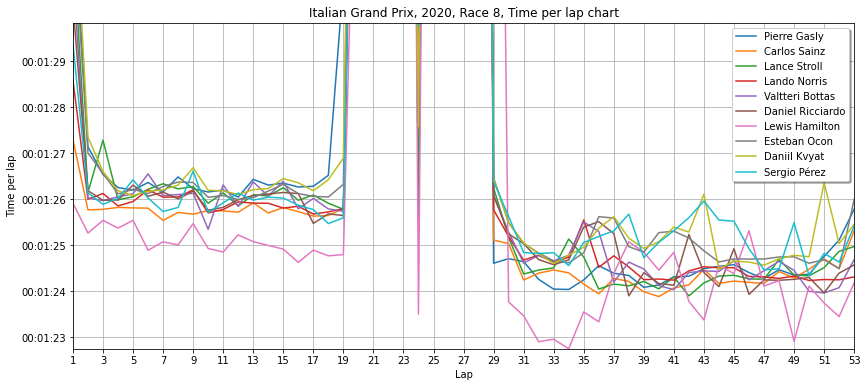

In [2]:
raceId = lap_times_df.raceId.drop_duplicates().iloc[-1]
race_df = lap_times_df[lap_times_df["raceId"] == raceId].copy()
plt.figure(figsize=(14, 6))

for driverId in results_df[results_df.raceId == raceId]["driverId"].iloc[:10]:
    driver_info = drivers_df[drivers_df["driverId"] == driverId]
    driver_name = driver_info["forename"] + ' ' + driver_info["surname"]
    plt.plot(race_df[race_df.driverId == driverId].lap, 
             pd.to_datetime(race_df[race_df.driverId == driverId].milliseconds, unit='ms'),
             label = driver_name.iloc[0])

high_lim = race_df.milliseconds.quantile(0.75) + iqr(race_df.milliseconds) * 1.5
min_ms_value = race_df.milliseconds.min()
race_name = races_df[races_df["raceId"] == raceId]["name"].iloc[0]
race_year = races_df[races_df["raceId"] == raceId]["year"].iloc[0]
race_round = races_df[races_df["raceId"] == raceId]["round"].iloc[0]

plt.xticks(np.arange(race_df["lap"].values.min(), race_df["lap"].values.max()+1, 2.0))
plt.gca().yaxis.set_major_locator(mdate.SecondLocator())
plt.xlim(race_df["lap"].values.min(), race_df["lap"].values.max())
plt.ylim(pd.to_datetime([min_ms_value, high_lim] , unit='ms'))
plt.xlabel('Lap')
plt.ylabel('Time per lap')
plt.title(str(race_name) + ', ' + str(race_year) + ', Race ' + str(race_round) + ', Time per lap chart')
plt.legend(fancybox=True, shadow=True)
plt.grid()
plt.show()